In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Training data

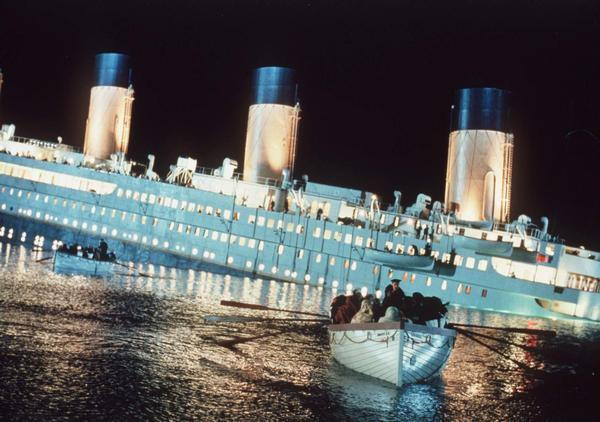

In [2]:
train_data = pd.read_csv("/home/becode/becode/kaggle/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.isnull().values.any()

True

In [5]:
train_data[train_data.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Drop columns I won't use:

training = train_data.drop(['PassengerId','Name','Age','Ticket','Cabin','Embarked'], axis=1)
training.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [8]:
training = training.dropna()
label = training['Survived']
features = training.drop('Survived', axis = 1)

### Test data

In [9]:
test_data = pd.read_csv("/home/becode/becode/kaggle/titanic/test.csv")
test_data.head()
test_data.shape

(418, 11)

In [10]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df = test_data[['Fare']]
nan_rows = df[df.isnull().any(axis=1)]
nan_rows

,Fare
152,NaN


In [12]:
### Reemplazo nan segun clase social
test_data['Fare'].iloc[152] = 7
test_data.iloc[152]

/home/becode/anaconda3/envs/pyfun/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                            7
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [13]:
# test_data = test_data.dropna()
test_data.shape

(418, 11)

### Distribution of survivors by sex:

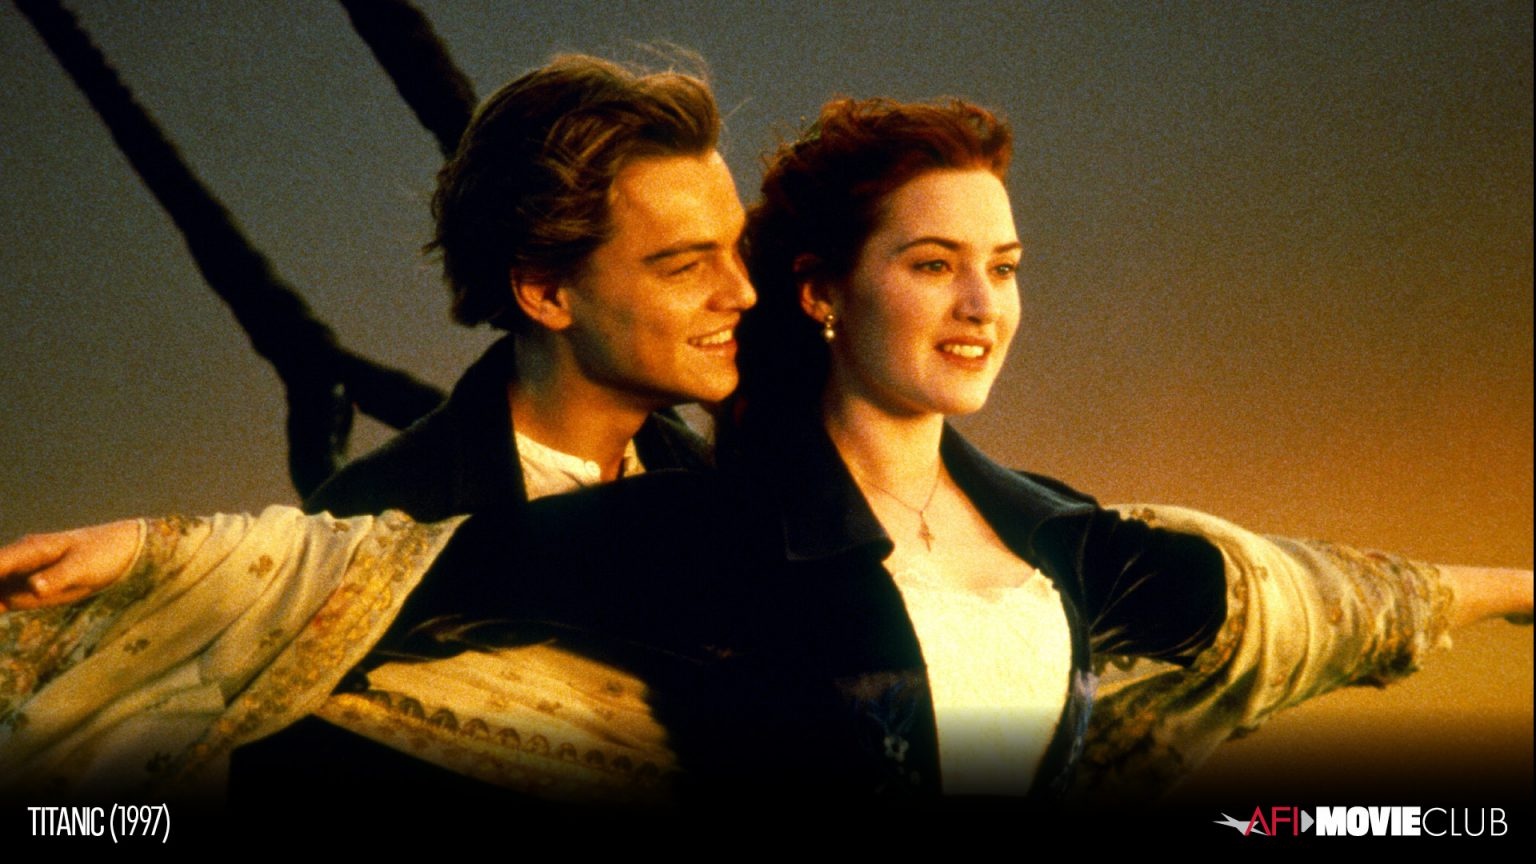

In [14]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
total_women = train_data.loc[train_data.Sex == 'female']

men = train_data.loc[train_data.Sex == 'male']["Survived"] 
total_men = train_data.loc[train_data.Sex == 'male']

rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)

dist_men = len(total_men) / ( len(total_women) + len(total_men) )
dist_women = 1 - dist_men

print(f"Distribution of passangers: {dist_women* 100}% women and {dist_men*100}% men \n")
print("% of women who survived:", rate_women*100)
print("% of men who survived:", rate_men*100)

Distribution of passangers: 35.24130190796857% women and 64.75869809203144% men 

% of women who survived: 74.20382165605095
% of men who survived: 18.890814558058924


### ML model: KNN (K nearest neighbors)

In [15]:
features.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,1,0,7.2500
1,1,female,1,0,71.2833
2,3,female,0,0,7.9250
3,1,female,1,0,53.1000
4,3,male,0,0,8.0500


In [16]:
print(features.shape)
print(label.shape)

(891, 5)
(891,)


In [17]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
sex_encoded = le.fit_transform(features.Sex)

In [18]:
# Combining features in list:
pclass = features.Pclass
sibsp = features.SibSp
parch = features.Parch
fare = features.Fare

features_list = list( zip(pclass, sex_encoded, sibsp, parch, fare))
features_list_simp = list( zip(pclass, sex_encoded, fare))


In [19]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 12 # K value

model = KNeighborsClassifier(n_neighbors)

# Train the model using the training sets
model.fit(features_list,label)

# print(features_list)


KNeighborsClassifier(n_neighbors=12)

### Enconding test data to make predictions:

In [20]:
# Converting string labels into numbers.
sex_encoded = le.fit_transform(test_data.Sex)

# Combining features in list:
pclass = test_data.Pclass
sibsp = test_data.SibSp
parch = test_data.Parch
fare = test_data.Fare

test_list = list( zip(pclass, sex_encoded, sibsp, parch, fare) )
test_list_simp = list( zip(pclass, sex_encoded, fare) )

# le.inverse_transform(sex_encoded)

In [21]:
#Predict Output

predicted = model.predict(test_list)
# print(predicted)
# print(len(predicted))

### Jack and Rose

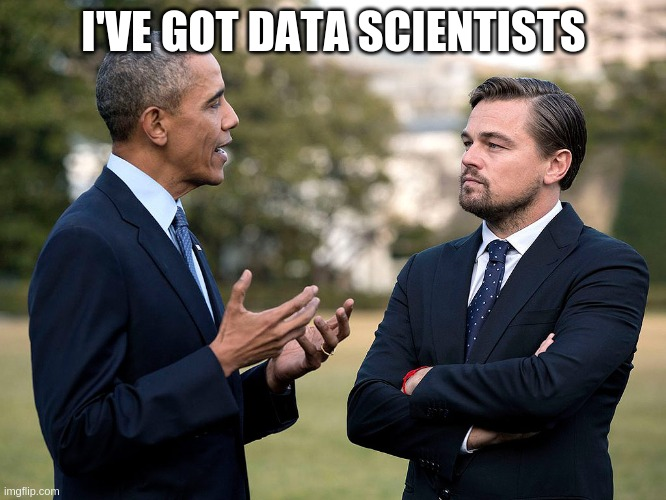

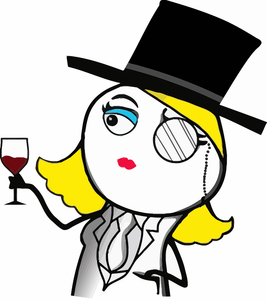


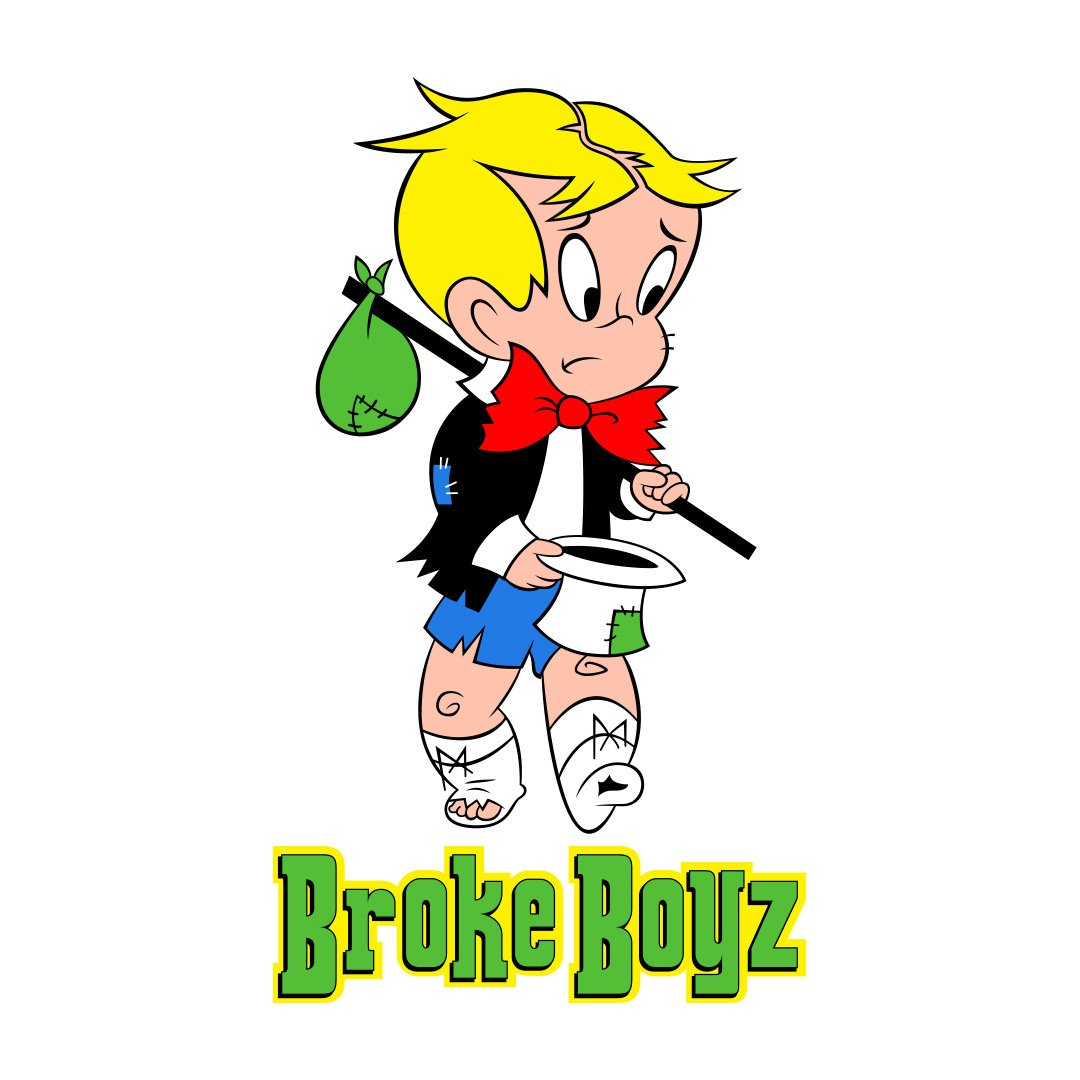

In [38]:
jack = [1, 1, 0, 0, 100]    #Class, sex= 1 Male, 0 Female, sibsp, parch, fare= 7 cheapest, 512 most expensive
rose = [1, 0, 0, 0, 100]

print('Survive: 0 = No, 1 = Yes \n' )
print(f'Is Jack going to survive?: {model.predict([jack])}')
print(f'Is Rose going to survive?: {model.predict([rose])}')

Survive: 0 = No, 1 = Yes 

Is Jack going to survive?: [1]
Is Rose going to survive?: [1]


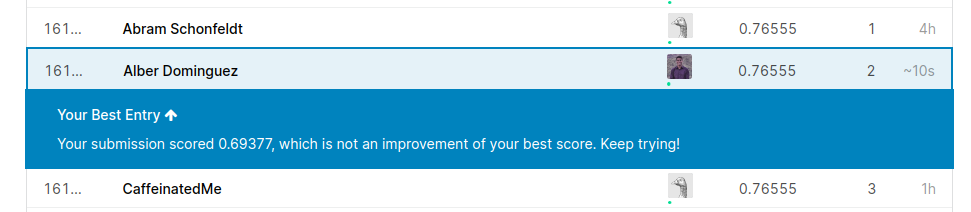

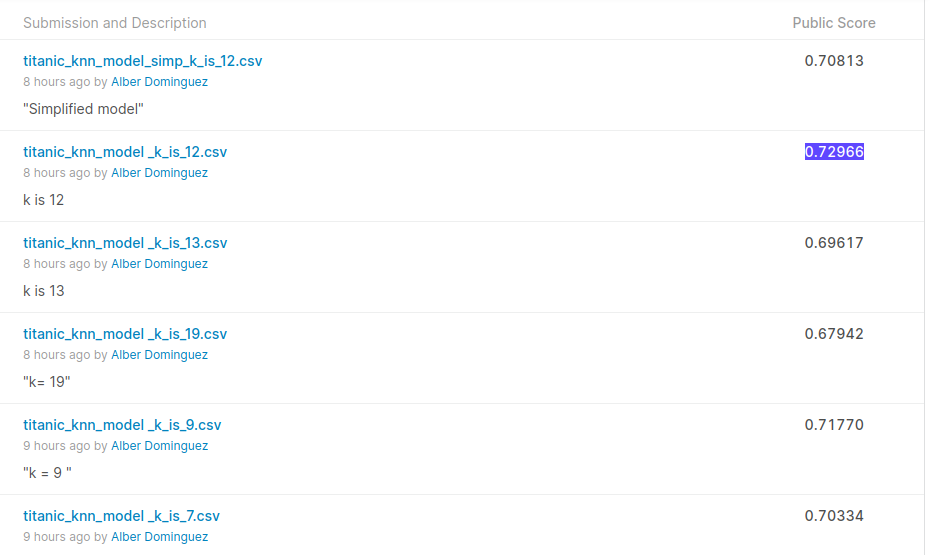

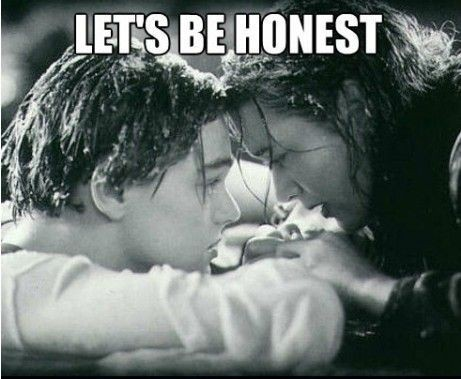

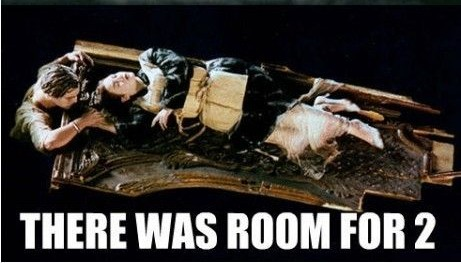

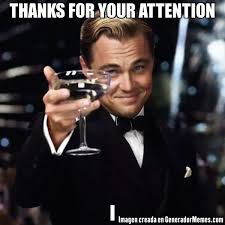

In [23]:
# # Model accuracy : In this case I dont have the y_test to calculate it

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?

# y_test = test_data['Survived']
# y_pred = predicted
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [24]:
### The data for kaggle must be a csv file with the columns df['PassengerId','Survived']

# passengers = test_data[['PassengerId']]

In [25]:
# df = pd.DataFrame(predicted, columns=["Survived"])

In [26]:
# result = pd.concat([passengers, df], axis=1, sort=False, join = "inner")
# print(result.shape)
# result.head()

In [27]:
# result.to_csv('titanic_knn_model.csv', index = False) 

In [28]:
# ### Simplified model


# from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = 12 # K value (taking as criteria sqrt(#samples))
# model = KNeighborsClassifier(n_neighbors)

# # Train the model using the training sets
# model.fit(features_list_simp,label)

# #Predict Output

# predicted_simp = model.predict(test_list_simp)


In [29]:
# passengers = test_data[['PassengerId']]
# df = pd.DataFrame(predicted_simp, columns=["Survived"])
# result = pd.concat([passengers, df], axis=1, sort=False, join = "inner")
# print(result.shape)
# result.head()
# result.to_csv('titanic_knn_model_simp.csv', index = False) 
